In [ ]:
crash_seeds.index(681)

In [ ]:
# For finding new potential crash indices
for i in range(600,800):
    np.random.seed(i)
    print("seed: ", i)

    # Generating the close prices from a skewed student-t distribution
    dist_close = SST(mu = returns_close_real.mean()/1, 
                sigma = returns_close_real.std()/1, 
                nu = 1.05, tau = 3) # nu > 1 results in skewness > 0 and vice versa
                                    # tau >! 2 to closer to 2 the more kurtosis
                                        
    # Samples randomly from the generated distribution to get the closing prices
    returns_close_syn = dist_close.r(len(returns_close_real)+1) # +1 ?? (len of real and syn are sometimes not equal!)
    #statistics(returns_close_real, returns_close_syn, qqplot=True, cdf=True)

    # Generate prices
    start_price = crash_real["close"][0]
    close = pd.Series(start_price*(1+returns_close_syn).cumprod())
    
    print(f"STD real: {crash_real['close'].std()} | STD syn: {close.std()}")
    
    plt.plot(close, alpha=.7, lw=0.6)
    plt.plot(crash_real["close"], label="close real", alpha=.7, lw=0.6)
    plt.legend()
    plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(color_codes=True)
sns.set_context('talk', font_scale=0.6)
import datetime

from sstudentt import SST

# adding Automated_Update to the system path
import sys
sys.path.insert(0, 'C:\\Users\\chris\\Documents\\GitHub\\RL-and-Cryptocurrencies\\cryptoportfolio\\data')

from data_utils import origin
from data_utils import crash_seeds
from data_utils import statistics

def find_seed():
    
    for seed in crash_seeds:
    
        # Random seed dictates the shape of the synthetic crash
        np.random.seed(seed)
        
        # Generating the close prices from a skewed student-t distribution
        dist_close = SST(mu = returns_close_real.mean()/1, 
                sigma = returns_close_real.std()/1.0,
                nu = 1, tau = 2.5) # nu > 1 results in skewness > 0 and vice versa
                                    # tau >! 2 to closer to 2 the more kurtosis

        # Samples randomly from the generated distribution to get the closing prices
        returns_close_syn = dist_close.r(len(returns_close_real)+1) # +1 ?? (len of real and syn are sometimes not equal!)
        #statistics(returns_close_real, returns_close_syn, qqplot=True, cdf=True)

        # Generate prices
        start_price = crash_real["close"][0]
        close = pd.Series(start_price*(1+returns_close_syn).cumprod())

        print(f"STD real: {crash_real['close'].std()} | STD syn: {close.std()}")

        plt.plot(close, label=f"close: seed {np.where(np.array(crash_seeds) == seed)[0][0]}", alpha=.7, lw=.6)
        plt.plot(crash_real["close"], label="close real", alpha=.7, lw=0.6)
        plt.legend()
        plt.show()

In [ ]:
# Finding the best seed for closest resemblance to real crash
find_seed()

x 464 y 35621


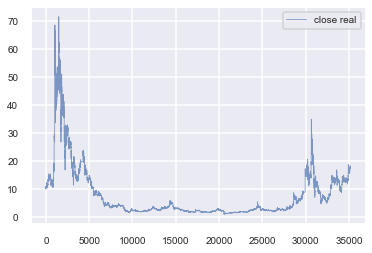

(array([1486], dtype=int64),)


In [2]:
# Loading data and approximating the close series
symbol = "QTUM"

# Analysis of historical crash
coin = pd.read_csv(f"../../raw/{symbol}_USDT_{origin[symbol]}_1h.csv")

#x = 0; y = len(coin)
#x = 9300; y=x+8700 # 1yr 2018 crash
#x = 6457; y = x + 2400 # 3m 2021 crash
#x = 43531; y = x + 7050 # 1yr 2022 crash
x = 35621 - 35157; y = x + 35157
print("x", x, "y", y)
crash_real = coin.iloc[x:y].reset_index(drop=True)
returns_close_real = (crash_real["close"]).pct_change().dropna()

plt.plot(crash_real["close"], label="close real", alpha=.7, lw=0.8)
plt.legend()
plt.show()

print(np.where(crash_real["close"][:] == crash_real["close"][:].max()))

##### Generating the closing prices

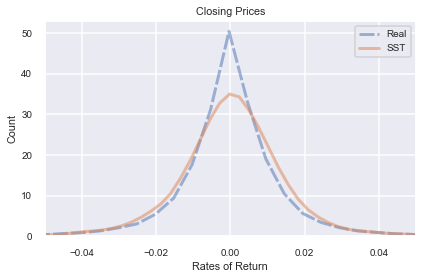

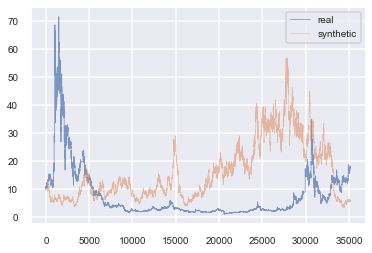

In [3]:
seed_index = 55 # Change the seed to the most appropriate one!
np.random.seed(crash_seeds[seed_index])

# Generating the close prices from a skewed student-t distribution
dist_close = SST(mu = returns_close_real.mean()/1,
                sigma = returns_close_real.std()/1,
                nu = 0.96, tau = 3.3) # nu > 1 results in skewness > 0 and vice versa
                                    # tau >! 2 to closer to 2 the more kurtosis
                                    
# Samples randomly from the generated distribution to get the closing prices
returns_close_syn = dist_close.r(len(returns_close_real)+1) # +1 ?? (len of real and syn are sometimes not equal!)
#statistics(returns_close_real, returns_close_syn, qqplot=True, cdf=True)

#plt.hist(returns_close_real, bins='auto', label="real", alpha=0.2, color="black")
#plt.hist(returns_close_syn, bins='auto', label="syn", alpha=0.2, color="green")

sns.kdeplot(returns_close_real, label="Real", alpha=0.5,  linestyle=(0, (5, 1)), linewidth=3)
sns.kdeplot(returns_close_syn, label="SST", alpha=.5, linewidth=3)

plt.title("Closing Prices")
plt.xlim([-0.05,0.05])
plt.legend()
plt.ylabel("Count")
plt.xlabel("Rates of Return")
plt.tight_layout()
#plt.savefig("closing_dist.png", dpi=600)
plt.show()

# Generate prices
start_price = crash_real["close"][0]
close = pd.Series(start_price*(1+returns_close_syn).cumprod())

plt.plot(crash_real["close"], label="real", alpha=.7, lw=0.8)
plt.plot(close, label="synthetic", lw=0.5, alpha=.5)
plt.legend()
plt.show()

##### Generating the open prices from the close prices

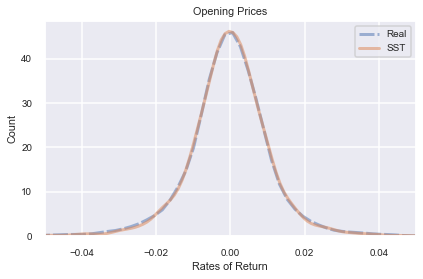

In [4]:

np.random.seed(crash_seeds[seed_index])

returns_open_real = ((crash_real["close"] - crash_real["open"]) / crash_real["open"]) # for high prices

# Estimating the distribution of open - close values
dist_open = SST(mu =  returns_open_real.mean()/1, 
                sigma = returns_open_real.std()/1.0,
                nu = 0.96, tau = 3.3)
returns_open_syn = dist_open.r(len(returns_open_real)+1)

sns.kdeplot(returns_open_real, label="Real", alpha=0.5, linestyle=(0, (5, 1)), linewidth=3)
sns.kdeplot(returns_open_syn, label="SST", alpha=.5, linewidth=3)

plt.title("Opening Prices")
plt.xlim([-0.05,0.05])
plt.legend()
plt.ylabel("Count")
plt.xlabel("Rates of Return")
plt.tight_layout()
#plt.savefig("opening_dist.png", dpi=600)
plt.show()

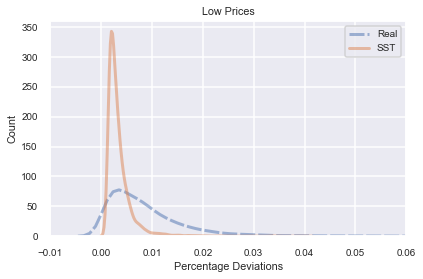

In [5]:
# Generating the low distribution
np.random.seed(crash_seeds[seed_index])

# Calculating the percentage deviations between close and low values
percentage_deviations_low_real = (crash_real["close"] - crash_real["low"]) / crash_real["low"]

# Estimating the distribution of low - close values
"""dist_low = SST(mu =  percentage_deviations_low_real.mean()/1.5,         
               sigma = percentage_deviations_low_real.std()/1,
                nu = 10, tau = 2.1)"""
dist_low = SST(mu =  percentage_deviations_low_real.mean()/2.5,
                sigma = percentage_deviations_low_real.std()/2.5,
                nu = 10, tau = 2.4)
percentage_deviations_low_syn = dist_low.r(len(percentage_deviations_low_real))
percentage_deviations_low_syn[percentage_deviations_low_syn < 0] = 0 # values can't be negative since low price is the minimum

sns.kdeplot(percentage_deviations_low_real, label="Real", alpha=0.5, linestyle=(0, (5, 1)), linewidth=3)
sns.kdeplot(percentage_deviations_low_syn, label="SST", alpha=.5, linewidth=3)

plt.title("Low Prices")
plt.xlim([-0.01,0.06])
plt.legend()
plt.ylabel("Count")
plt.xlabel("Percentage Deviations")
plt.tight_layout()
#plt.savefig("low_dist.png", dpi=600)
plt.show()

#statistics(percentage_deviations_low_real, percentage_deviations_low_syn, qqplot=True)

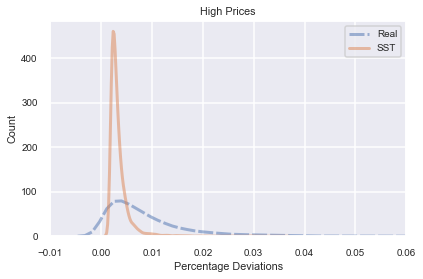

In [6]:
# Generating the high distribution
np.random.seed(crash_seeds[seed_index])

# Calculating the percentage deviations between high and close values
percentage_deviations_high_real = ((crash_real["high"] - crash_real["close"]) / crash_real["close"]) # for high prices

# Estimating the distribution of high - close values
"""dist_high = SST(mu =  percentage_deviations_high_real.mean()/2,
                sigma = percentage_deviations_high_real.std()/1,
                nu = 10, tau = 2.02)"""
dist_high = SST(mu =  percentage_deviations_high_real.mean()/2.5,
                sigma = percentage_deviations_high_real.std()/2.5,
                nu = 10, tau = 2.2)
percentage_deviations_high_syn = dist_high.r(len(percentage_deviations_high_real))
percentage_deviations_high_syn[percentage_deviations_high_syn < 0] = 0 # values can't be negative since low price is the minimum

sns.kdeplot(percentage_deviations_high_real, label="Real", alpha=0.5, linestyle=(0, (5, 1)), linewidth=3)
sns.kdeplot(percentage_deviations_high_syn, label="SST", alpha=0.5, linewidth=3)

plt.title("High Prices")
plt.xlim([-0.01,0.06])
plt.legend()
plt.ylabel("Count")
plt.xlabel("Percentage Deviations")
plt.tight_layout()
#plt.savefig("high_dist.png", dpi=600)
plt.show()

#statistics(percentage_deviations_high_real, percentage_deviations_high_syn)

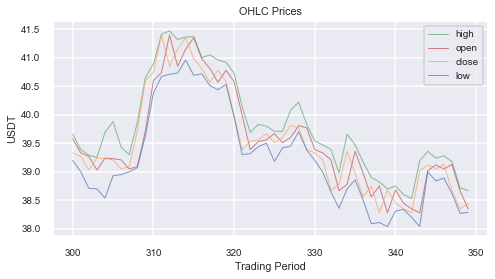

In [7]:
# Estimating realistic values for the cutoff for high and low prices 
edge = 0.04
#print(np.where(((crash_real["close"] - crash_real["low"]) / crash_real["low"]) > edge))
#print(np.where(((crash_real["high"] - crash_real["close"]) / crash_real["close"]) > edge))

start=300;end=350
lw=1.0; alpha = 0.7
plt.figure(figsize=(7,4))
plt.title("OHLC Prices")
plt.plot(crash_real["high"][start:end], label="high", lw=lw, alpha=alpha, color="g")
plt.plot(crash_real["open"][start:end], label="open", lw=lw, alpha=alpha, color="r")
plt.plot(crash_real["close"][start:end], label="close", lw=lw, alpha=alpha, color="sandybrown")
plt.plot(crash_real["low"][start:end], label="low", lw=lw, alpha=alpha, color="b")
plt.legend()
plt.xlabel("Trading Period")
plt.ylabel("USDT")
plt.tight_layout()
#plt.savefig("OHLC_prices.png", dpi=600)
plt.show()

In [8]:
def sampling(dist, epsilon):
        sample = dist.r(1)[0]
        
        # Prevent deviations greater than epsilon
        while sample > epsilon:
            #return 0.001
            sample = dist.r(1)[0]
            
        # Since the sampling function is only used for low and high values, 
        # it is necessary to ensure that the sample is always positive to 
        # ensure that the low value is always the lowest and the high value
        # is always the highest at any respective time
        if sample < 0:
            return 0
        else:
            return sample
        
# Calculating all values
low, high, open = [], [], []
np.random.seed(crash_seeds[seed_index])
epsilon = edge

start = datetime.datetime.now() # Starts the timer

for i in range(len(close)):
    
    # Displays the current status of the computation
    if (10*i/len(close)) % 1 == 0 and (i/len(close)) != 0: 
        print(str(round(100*i/len(close))) + "% Done")
    
    if i == 0:# or i == len(close)-1: 
        # First opening price since there is no respective closing value
        open_value = close[i] / (dist_open.r(1)[0] + 1)
        open.append(open_value)
    else:
        # Open value is the closing value from the previous hour
        open_value = close[i-1]
        open.append(open_value)
        
    # Randomly sample value from the distribution and calculate the low value
    low_value = close[i] / (sampling(dist_low, epsilon) + 1)
    
    # The low value must always be the min value for every respective hour
    while low_value > open[i]:
        if (close[i] - open[i]) / open[i] > epsilon: # not possible to reach the necessary deviation because epsilon cuts off distribution
            low_value = open[i]
        else:
            low_value = close[i] / (sampling(dist_low, epsilon) + 1) # potential bottleneck if epsilon is chosen very small 
            # because probability of choosing necessary value becomes increasingly smaller  
    low.append(low_value)
    
    # Randomly sample value from the distribution and calculate the high value
    high_value = close[i] * (sampling(dist_high, epsilon) + 1)

    # The high value must always be the max value for every respective hour
    while high_value < open[i]:
        if (open[i] - close[i]) / close[i] > epsilon: # not possible to reach the necessary deviation
            high_value = open[i]
        else:
            high_value = close[i] * (sampling(dist_high, epsilon) + 1) # potential bottleneck if epsilon is chosen very small 
    high.append(high_value)

print("100% Done")
runtime = (datetime.datetime.now() - start).total_seconds()
print("Run Time", runtime, "s")

open = pd.Series(open)
high = pd.Series(high)
low = pd.Series(low)

10% Done
20% Done
30% Done
40% Done
50% Done
60% Done
70% Done
80% Done
90% Done
100% Done
Run Time 208.905234 s


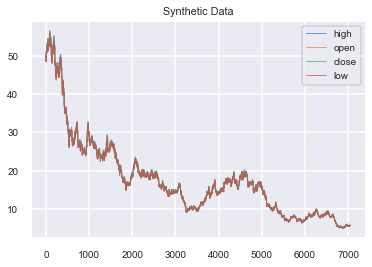

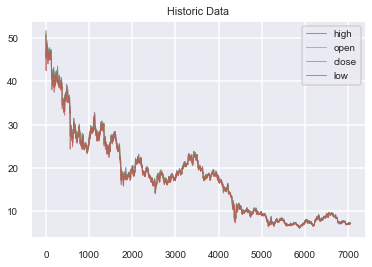

In [9]:
start=0; end = len(high)

plt.title("Synthetic Data")
plt.plot(high[start:end], label="high", lw=lw, alpha=alpha)
plt.plot(open[start:end], label="open", lw=lw, alpha=alpha)
plt.plot(close[start:end], label="close", lw=lw, alpha=alpha)
plt.plot(low[start:end], label="low", lw=lw, alpha=alpha)
plt.legend()
plt.show()

plt.title("Historic Data")
plt.plot(crash_real["high"][start:end], label="high", lw=lw, alpha=alpha)
plt.plot(crash_real["open"][start:end], label="open", lw=lw, alpha=alpha)
plt.plot(crash_real["close"][start:end], label="close", lw=lw, alpha=alpha)
plt.plot(crash_real["low"][start:end], label="low", lw=lw, alpha=alpha)
plt.legend()
plt.show()

In [10]:
from scipy.stats import skew
from scipy.stats import kurtosis

def statistics(returns_real, returns_syn, price, qqplot=True, cdf=False):
    """ Basic statistical analysis of given returns """
    
    #plt.title("Histogram")
    #plt.hist(returns_real, bins='auto', label="real", alpha=0.7)#, color="black")
    #plt.hist(returns_syn, bins='auto', label="syn", alpha=0.7)#, color="green")
    sns.kdeplot(returns_real, label=f"Real {price}", alpha=0.5, linestyle=(0, (5, 1)), linewidth=3)
    sns.kdeplot(returns_syn, label=f"Synthetic {price}", alpha=.5, linewidth=3)
    plt.xlim([-0.1,0.1])
    plt.ylabel("Count")
    plt.xlabel("Rates of Return")
    plt.legend()
    plt.tight_layout()
    #plt.savefig(f"{price}_comp", dpi=600)
    plt.show()

    if qqplot == True:
        
        t = np.linspace(0.01,0.99,1000)
        q1 = np.quantile(returns_real,t)
        q2 = np.quantile(returns_syn,t)
        plt.title(f"Q-Q plot for {price} prices")
        plt.plot(q1, q2, lw=4)
        plt.plot([min(q1),max(q1)],[min(q2),max(q2)], label="Test Line", alpha=0.7, lw=3.5)
        plt.xlim((min(q1),max(q1)))
        plt.ylim((min(q2),max(q2)))
        plt.xlabel("Real Returns")
        plt.ylabel("Synthetic Returns")
        plt.legend()
        plt.tight_layout()
        #plt.savefig(f"{price}_qq", dpi=600)
        plt.show()
        
    if cdf == True:

        plt.title("CDF Plot")
        plt.plot(np.sort(returns_real), 1. * np.arange(len(returns_real)) / (len(returns_real) - 1), label="Real")
        plt.plot(np.sort(returns_syn), 1. * np.arange(len(returns_syn)) / (len(returns_syn) - 1), label="Syn")
        plt.legend()
        plt.tight_layout()
        plt.show()
 
    print("For approximated distribution: ")
    print("Mean: ", returns_real.mean(), " (real) | ", returns_syn.mean(), " (syn)")
    print("Std: ", returns_real.std(), " (real) | ", returns_syn.std(), " (syn)")
    print("Skewness: ", skew(returns_real), " (real) | ", skew(returns_syn), " (syn)")
    print("Kurtosis: ", kurtosis(returns_real), " (real) | ", kurtosis(returns_syn), " (syn)")


Comparison of close :


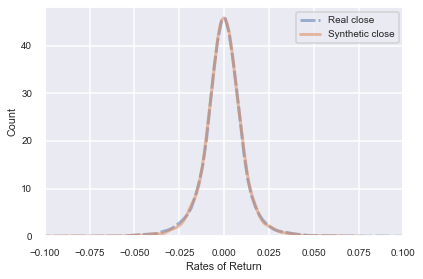

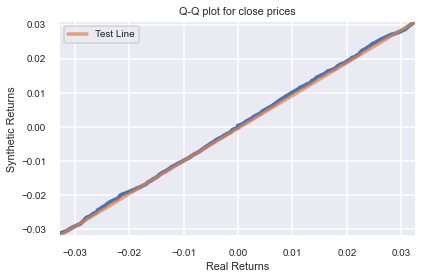

For approximated distribution: 
Mean:  -0.0002054891755261868  (real) |  -0.000242971162682777  (syn)
Std:  0.012008714257195434  (real) |  0.011703542695756394  (syn)
Skewness:  0.34166177932576297  (real) |  -0.703968323880558  (syn)
Kurtosis:  27.264943693498555  (real) |  9.739060998820786  (syn)

Comparison of open :


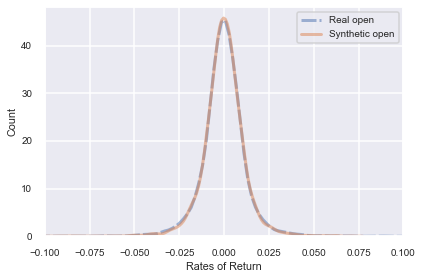

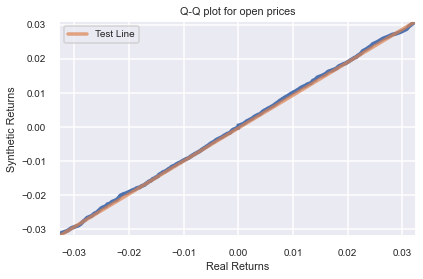

For approximated distribution: 
Mean:  -0.0002089400334565169  (real) |  -0.00024359971833710562  (syn)
Std:  0.01198429814681215  (real) |  0.011704073620497588  (syn)
Skewness:  0.3175418336710645  (real) |  -0.7038282714336144  (syn)
Kurtosis:  27.381918859920535  (real) |  9.736734384054511  (syn)

Comparison of high :


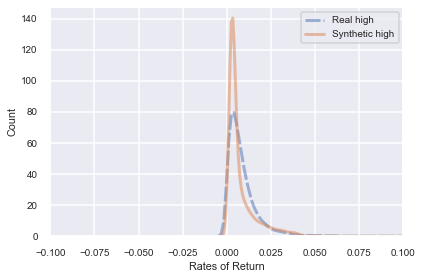

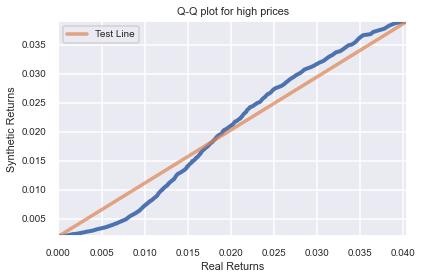

For approximated distribution: 
Mean:  0.008678263600353838  (real) |  0.007739026370224899  (syn)
Std:  0.009026899676009122  (real) |  0.0090527256436003  (syn)
Skewness:  5.774705418789669  (real) |  3.6709673465570685  (syn)
Kurtosis:  116.96148618987185  (real) |  26.565868201628852  (syn)


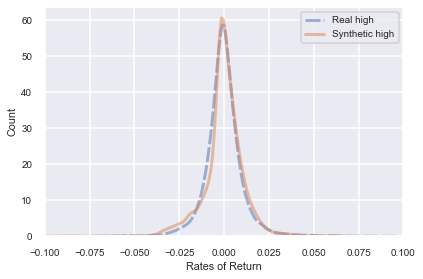

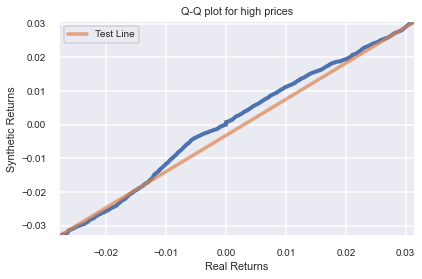

For approximated distribution: 
Mean:  -0.00022581261070188933  (real) |  -0.0002438848675892025  (syn)
Std:  0.010364570056989562  (real) |  0.011577730148876494  (syn)
Skewness:  0.5682021638771232  (real) |  -0.8165030427632068  (syn)
Kurtosis:  6.830049022138381  (real) |  9.038876314467997  (syn)

Comparison of low :


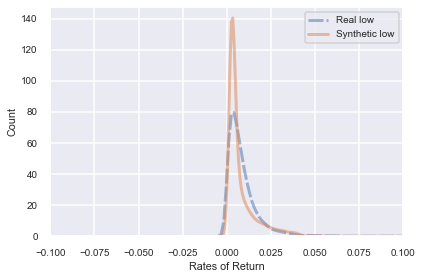

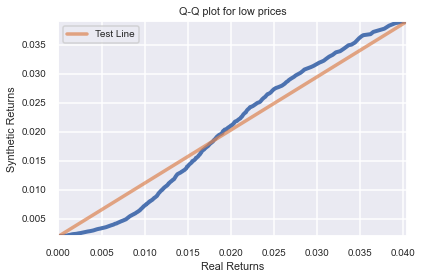

For approximated distribution: 
Mean:  0.008678263600353838  (real) |  0.007739026370224899  (syn)
Std:  0.009026899676009122  (real) |  0.0090527256436003  (syn)
Skewness:  5.774705418789669  (real) |  3.6709673465570685  (syn)
Kurtosis:  116.96148618987185  (real) |  26.565868201628852  (syn)


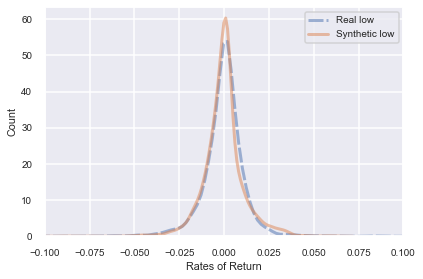

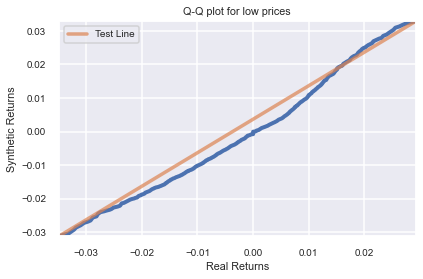

For approximated distribution: 
Mean:  -0.00020335214492410742  (real) |  -0.0002439431742743541  (syn)
Std:  0.012184709727647831  (real) |  0.01164802472773105  (syn)
Skewness:  -0.790822759186065  (real) |  -0.534091703735432  (syn)
Kurtosis:  35.81492061357565  (real) |  8.952588811743484  (syn)


In [11]:
# Statistics for the generated prices series
prices = {"close":close,"open":open,"high":high,"low":low}

for price, series in prices.items():
    print("\nComparison of", price, ":")
    
    returns_real = (crash_real[price]).pct_change().dropna() # for single price series
    returns_syn = (series).pct_change().dropna() # for single price series

    if price == "high":
        percentage_deviations_high_real = (crash_real["high"] - crash_real["close"]) / crash_real["close"] # for high prices
        percentage_deviations_high_syn = (high - close) / close # for high prices

        statistics(percentage_deviations_high_real, percentage_deviations_high_syn, price)
        
    elif price == "low":
        percentage_deviations_low_real = (crash_real["close"] - crash_real["low"]) / crash_real["low"] # for high prices
        percentage_deviations_low_syn = (close - low) / low # for high prices

        statistics(percentage_deviations_high_real, percentage_deviations_high_syn, price)

    statistics(returns_real, returns_syn, price)

In [ ]:
"""lw=0.5; alpha = 1
for i in range(0, len(high), 200):

    start=i; end = i+99#len(high)
    #print(start, end)
    plt.title("Synthetic Data", fontweight="bold")
    plt.plot(high[start:end], label="high", lw=lw, alpha=alpha, color="g")
    plt.plot(open[start:end], label="open", lw=lw, alpha=alpha, color="r")
    plt.plot(close[start:end], label="close", lw=lw, alpha=alpha, color="sandybrown")
    plt.plot(low[start:end], label="low", lw=lw, alpha=alpha, color="b")
    plt.legend()
    plt.tight_layout()
    #if i == 3800:
    #    plt.savefig("dot_syn_ex.png",dpi=600)
    plt.show()

    plt.title("Historical Data", fontweight="bold")
    plt.plot(crash_real["high"][start:end], label="high", lw=lw, alpha=alpha, color="g")
    plt.plot(crash_real["open"][start:end], label="open", lw=lw, alpha=alpha, color="r")
    plt.plot(crash_real["close"][start:end], label="close", lw=lw, alpha=alpha, color="sandybrown")
    plt.plot(crash_real["low"][start:end], label="low", lw=lw, alpha=alpha, color="b")
    plt.legend()
    plt.tight_layout()
    #if i == 3800:
    #    plt.savefig("dot_real_ex.png",dpi=600)
    plt.show()"""

In [ ]:
# Writing the synthetic data to a csv-file

"""
import pandas as pd
import datetime as dt
from datetime import timedelta

df = pd.DataFrame()
df["close"] = close
df["high"] = high
df["low"] = low
df["open"] = open

start_date = dt.datetime(2017, 1, 1, 1, 0)
df["time"] = [start_date + timedelta(hours=1 * i) for i in range(len(low))]
df = df[['time', 'open', 'low', 'high', 'close']]

df.to_csv("synthetic_ohcl_data.csv", index=False)
"""


In [ ]:

"""
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns_close_real,t)
q2 = np.quantile(normal,t)
plt.title("Q-Q Plot")
plt.plot(q1, q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)], label="Test Line")
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.legend()
plt.xlabel("Real Returns")
plt.ylabel("Normal Returns")
plt.tight_layout()
plt.savefig("qq_normal.png", dpi=600)
plt.show()

t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns_close_real,t)
q2 = np.quantile(returns_close_syn,t)
plt.title("Q-Q Plot")
plt.plot(q1, q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)], label="Test Line")
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Real Returns")
plt.ylabel("SST Returns")
plt.legend()
plt.tight_layout()
plt.savefig("qq_sst.png", dpi=600)
plt.show()

plt.title("CDF Plot")
plt.plot(np.sort(returns_close_real), 1. * np.arange(len(returns_close_real)) / (len(returns_close_real) - 1), label="Real", alpha=0.7)
plt.plot(np.sort(returns_close_syn), 1. * np.arange(len(returns_close_syn)) / (len(returns_close_syn) - 1), label="SST", alpha=0.7)
plt.plot(np.sort(normal), 1. * np.arange(len(normal)) / (len(normal) - 1), label="Normal", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig("cdf_plot.png",dpi=600)
plt.show()

import numpy as np
import pandas as pd
import sys
sys.path.insert(0, 'C:\\Users\\chris\\Documents\\GitHub\\RL-and-Cryptocurrencies\\cryptoportfolio\\data')
from data_utils import origin
import matplotlib.pyplot as plt
import datetime
from sstudentt import SST
import seaborn as sns

import scipy.stats as stats
from scipy.stats import cauchy

def cauchy(x):
   scale = 1
   loc = 0
   res = (1 / (np.pi * scale)) * (scale ** 2 / ((x - loc)**2 + scale**2))
   return res

#Creating a Function.
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

symbol = "BTC"
coin = pd.read_csv(f"../../raw/{symbol}_USDT_{origin[symbol]}_1h.csv")
x = 9300; y = x + 18000
crash_real = coin.iloc[x:y].reset_index(drop=True)
returns_close_real = (crash_real["close"]).pct_change().dropna()

dist_close = SST(mu = returns_close_real.mean()/2, 
                sigma = returns_close_real.std()/1.45, 
                nu = 1.0, tau = 3) # nu > 1 results in skewness > 0 and vice versa
                                    # tau >! 2 to closer to 2 the more kurtosis
                                    
# Samples randomly from the generated distribution to get the closing prices
returns_close_syn = dist_close.r(len(returns_close_real)+1) # +1 ?? (len of real and syn are sometimes not equal!)

normal = np.random.normal(loc=returns_close_real.mean()/1, scale=returns_close_real.std()/2.2, size=len(returns_close_real)+1)
cauchy = cauchy(np.linspace(-5, 5, 1000))/1

#sns.histplot(returns_close_syn, color="green", label="SST", kde=True, alpha=.2, line_kws={"lw":0.8, "alpha":0.7})
#sns.histplot(returns_close_real, color="black", label="Real", kde=True, alpha=.2, line_kws={"lw":0.8, "alpha":0.7})
#sns.histplot(normal, color="red", label="Normal", kde=True, alpha=.2, line_kws={"lw":0.8, "alpha":0.7})

sns.kdeplot(returns_close_real, color="black", label="Real", alpha=0.7, linestyle=(0, (5, 1)), linewidth=2)
sns.kdeplot(returns_close_syn, label="SST", alpha=.6, linewidth=1.5)
sns.kdeplot(normal, label="Normal", alpha=.6, linewidth=1.5)
#sns.kdeplot(cauchy, color="orange", label="Cauchy", alpha=.4)

plt.xlim([-0.03,0.03])
plt.ylabel("Count")
plt.xlabel("Rates of Return")
plt.legend()
plt.savefig("comparison_dist.png", dpi=600)
plt.show()


""" 


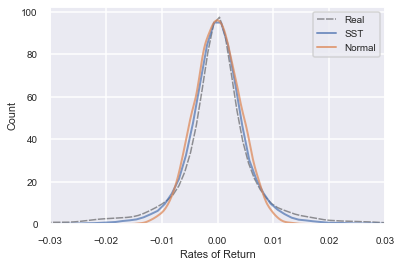

In [15]:
#Creating a Function.
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

symbol = "BTC"
coin = pd.read_csv(f"../../raw/{symbol}_USDT_{origin[symbol]}_1h.csv")
x = 9300; y = x + 18000
crash_real = coin.iloc[x:y].reset_index(drop=True)
returns_close_real = (crash_real["close"]).pct_change().dropna()

dist_close = SST(mu = returns_close_real.mean()/2, 
                sigma = returns_close_real.std()/1.45, 
                nu = 1.0, tau = 3) # nu > 1 results in skewness > 0 and vice versa
                                    # tau >! 2 to closer to 2 the more kurtosis
                                    
# Samples randomly from the generated distribution to get the closing prices
returns_close_syn = dist_close.r(len(returns_close_real)+1) # +1 ?? (len of real and syn are sometimes not equal!)

normal = np.random.normal(loc=returns_close_real.mean()/1, scale=returns_close_real.std()/2.2, size=len(returns_close_real)+1)
#cauchy = cauchy(np.linspace(-5, 5, 1000))/1

#sns.histplot(returns_close_syn, color="green", label="SST", kde=True, alpha=.2, line_kws={"lw":0.8, "alpha":0.7})
#sns.histplot(returns_close_real, color="black", label="Real", kde=True, alpha=.2, line_kws={"lw":0.8, "alpha":0.7})
#sns.histplot(normal, color="red", label="Normal", kde=True, alpha=.2, line_kws={"lw":0.8, "alpha":0.7})

sns.kdeplot(returns_close_real, color="black", label="Real", alpha=0.4, linestyle=(0, (5, 1)), linewidth=1.5)
sns.kdeplot(returns_close_syn, label="SST", alpha=.7, linewidth=2)
sns.kdeplot(normal, label="Normal", alpha=.7, linewidth=2)
#sns.kdeplot(cauchy, color="orange", label="Cauchy", alpha=.4)

plt.xlim([-0.03,0.03])
plt.ylabel("Count")
plt.xlabel("Rates of Return")
plt.legend()
plt.savefig("comparison_dist2.png", dpi=600)
plt.show()


c:\Users\chris\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


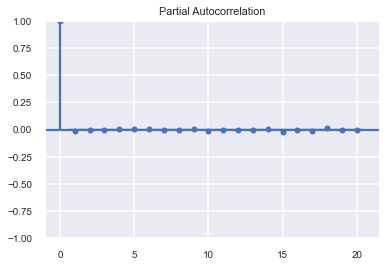

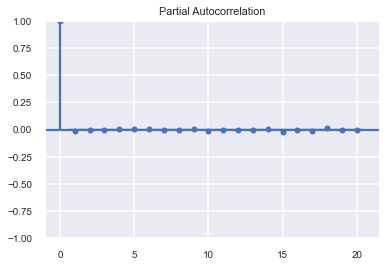

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

plot_pacf(pd.Series(returns_close_syn),lags=20)

In [ ]:
plt.plot(returns_close_real.rolling(20).std(), lw=0.5)
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()

In [ ]:
plt.plot(pd.Series(returns_close_syn).rolling(20).std(), lw=0.4)
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()

In [ ]:
from scipy.stats import skew
from scipy.stats import kurtosis

def stats(returns_real, returns_syn):
    print("For approximated distribution: ")
    print("Mean: ", returns_real.mean(), " (real) | ", returns_syn.mean(), " (syn)")
    print("Std: ", returns_real.std(), " (real) | ", returns_syn.std(), " (syn)")
    print("Skewness: ", skew(returns_real), " (real) | ", skew(returns_syn), " (syn)")
    print("Kurtosis: ", kurtosis(returns_real), " (real) | ", kurtosis(returns_syn), " (syn)")

stats(returns_close_real, returns_close_syn)

In [ ]:
stats(returns_close_real, normal)

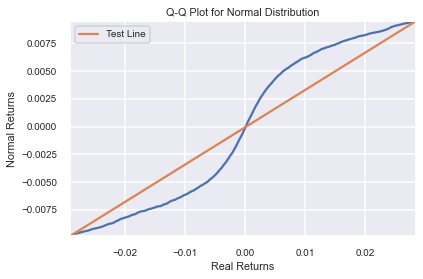

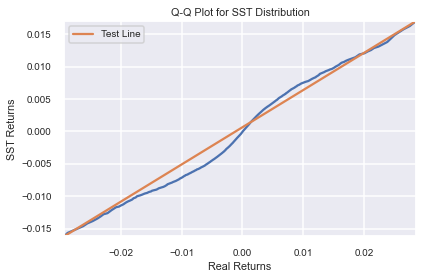

In [22]:
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns_close_real,t)
q2 = np.quantile(normal,t)
plt.title("Q-Q Plot for Normal Distribution")
plt.plot(q1, q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)], label="Test Line")
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.legend()
plt.xlabel("Real Returns")
plt.ylabel("Normal Returns")
plt.tight_layout()
plt.savefig("qq_normal.png", dpi=600)
plt.show()

t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns_close_real,t)
q2 = np.quantile(returns_close_syn,t)
plt.title("Q-Q Plot for SST Distribution")
plt.plot(q1, q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)], label="Test Line")
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Real Returns")
plt.ylabel("SST Returns")
plt.legend()
plt.tight_layout()
plt.savefig("qq_sst.png", dpi=600)
plt.show()